<a href="https://colab.research.google.com/github/SunStone-Secure-LLC/OSCAL-Plugfest-2025/blob/main/Presentations/SunStone/FedRAMP20xVisualize_KSI_AssessmentPlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: upload a file from local computer

from google.colab import files
uploaded = files.upload()

Saving assessment-plan-KSI-CNA.json to assessment-plan-KSI-CNA.json


In [2]:
# prompt: read uploaded as JSON and convert to yaml

!pip install pyyaml

import json
import yaml
import io

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Read the uploaded file
  content = uploaded[fn]

  # Assuming the file is JSON, decode it
  json_data = json.loads(content.decode('utf-8'))

  # Convert JSON to YAML
  yaml_data = yaml.dump(json_data)

  # Print the YAML data
  print("\n--- YAML Output ---")
yaml_data

User uploaded file "assessment-plan-KSI-CNA.json" with length 75737 bytes

--- YAML Output ---


'assessment-plan:\n  assessment-assets:\n    assessment-platforms:\n    - title: CSP Internal Monitoring Platform\n      uses-components:\n      - component-uuid: asset-log-analysis-platform-uuid\n      uuid: platform-csp-monitoring-uuid\n    components:\n    - description: Tool for analyzing cloud configurations against baselines.\n      status:\n        state: operational\n      title: Automated Configuration Analyzer\n      type: software\n      uuid: asset-assessment-tool-1-uuid\n    - description: Platform for collecting and analyzing security logs.\n      status:\n        state: operational\n      title: Log Aggregation and Analysis Platform\n      type: service\n      uuid: asset-log-analysis-platform-uuid\n  assessment-subjects:\n  - description: All cloud service provider infrastructure components supporting the\n      service offering.\n    include-all: {}\n    type: component\n  - description: Specific deployed services and tools relevant to the controls.\n    include-subjec

In [8]:
# prompt: pretty the yaml and generate a file to the local volume

# Convert YAML string back to Python object for pretty printing
yaml_object = yaml.safe_load(yaml_data)

# Pretty print the YAML data with proper indentation
pretty_yaml_data = yaml.dump(yaml_object, indent=2, default_flow_style=False)

print("\n--- Pretty YAML Output ---")
print(pretty_yaml_data)

# Save the pretty YAML to a file
with open('pretty_output.yaml', 'w') as f:
    f.write(pretty_yaml_data)

# Download the pretty YAML file
files.download('pretty_output.yaml')


--- Pretty YAML Output ---
assessment-plan:
  assessment-assets:
    assessment-platforms:
    - title: CSP Internal Monitoring Platform
      uses-components:
      - component-uuid: asset-log-analysis-platform-uuid
      uuid: platform-csp-monitoring-uuid
    components:
    - description: Tool for analyzing cloud configurations against baselines.
      status:
        state: operational
      title: Automated Configuration Analyzer
      type: software
      uuid: asset-assessment-tool-1-uuid
    - description: Platform for collecting and analyzing security logs.
      status:
        state: operational
      title: Log Aggregation and Analysis Platform
      type: service
      uuid: asset-log-analysis-platform-uuid
  assessment-subjects:
  - description: All cloud service provider infrastructure components supporting the
      service offering.
    include-all: {}
    type: component
  - description: Specific deployed services and tools relevant to the controls.
    include-subje

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# prompt: create a mermaid.js diagram of each of the assessment-plan.tasks in order from the json file

# Check if 'yaml_object' is defined and contains the expected structure
if 'yaml_object' in locals() and 'assessment-plan' in yaml_object and 'tasks' in yaml_object['assessment-plan']:
    tasks = yaml_object['assessment-plan']['tasks']

    # Start the Mermaid diagram string
    mermaid_diagram = "graph TD\n"

    # Create nodes for each task and connect them sequentially
    previous_task_id = None
    for i, task in enumerate(tasks):
        task_id = f"task{i}"
        task_description = task.get('description', f'Task {i+1}')
        mermaid_diagram += f"  {task_id}[{task_description}]\n"
        if previous_task_id:
            mermaid_diagram += f"  {previous_task_id}-->{task_id}\n"
        previous_task_id = task_id

    # Print the Mermaid diagram string
    print("\n--- Mermaid Diagram ---")
    print("```mermaid")
    print(mermaid_diagram)
    print("```")

else:
    print("Could not find 'assessment-plan.tasks' in the uploaded file.")
    print("Please ensure the uploaded JSON/YAML file has the expected structure.")



--- Mermaid Diagram ---
```mermaid
graph TD
  task0[Assess the implementation and effectiveness of DoS protection mechanisms based on NIST SP 800-53 SC-5.]
  task1[Assess the custom Denial of Service metric CNA-DOS-M1.]
  task0-->task1
  task2[Assess configuration of firewalls/proxies for traffic limiting and network segmentation (NIST SC-7), and custom metric CNA-BTC-M1.]
  task1-->task2
  task3[Assess immutable containers/serverless functions and least privilege (NIST SC-39), and custom metric CNA-ILP-M1 including verification of strictly defined functionality.]
  task2-->task3
  task4[Assess logical segmentation of micro-services, cloud-native virtual network traffic controls (NIST SC-7, SC-39), and custom metric CNA-MSE-M1.]
  task3-->task4
  task5[Assess the custom Cloud Native Enforcement metric CNA-NCE-M1 for virtual networking capabilities.]
  task4-->task5
  task6[Assess the custom Continuous Scanning Coverage metric CNA-CSC-M1.]
  task5-->task6
  task7[Assess continuous scan


--- GraphViz Diagram Source ---
// Assessment Plan Tasks
digraph {
	task0 [label="Assess NIST SC-5 Denial of Service (DoS) Protection"]
	task1 [label="Assess Custom DoS Metric CNA-DOS-M1"]
	task0 -> task1
	task2 [label="Assess Firewall/Proxy Config (SC-7 & CNA-BTC-M1)"]
	task1 -> task2
	task3 [label="Assess Immutability & Least Privilege (SC-39 & CNA-ILP-M1)"]
	task2 -> task3
	task4 [label="Assess Micro-service Segmentation (SC-7, SC-39 & CNA-MSE-M1)"]
	task3 -> task4
	task5 [label="Assess Custom Cloud Native Enforcement Metric (CNA-NCE-M1)"]
	task4 -> task5
	task6 [label="Assess Custom Continuous Scanning Coverage Metric (CNA-CSC-M1)"]
	task5 -> task6
	task7 [label="Assess NIST SR-12 Component Disposal (informed by scanning)"]
	task6 -> task7
	task8 [label="Assess Custom High Availability and Resilience Metric (CNA-HAR-M1)"]
	task7 -> task8
	task9 [label="Assess High Availability Design Principles (NIST SC-5, SC-12, SC-39)"]
	task8 -> task9
	task10 [label="Assess Aggregate KSI for Cl

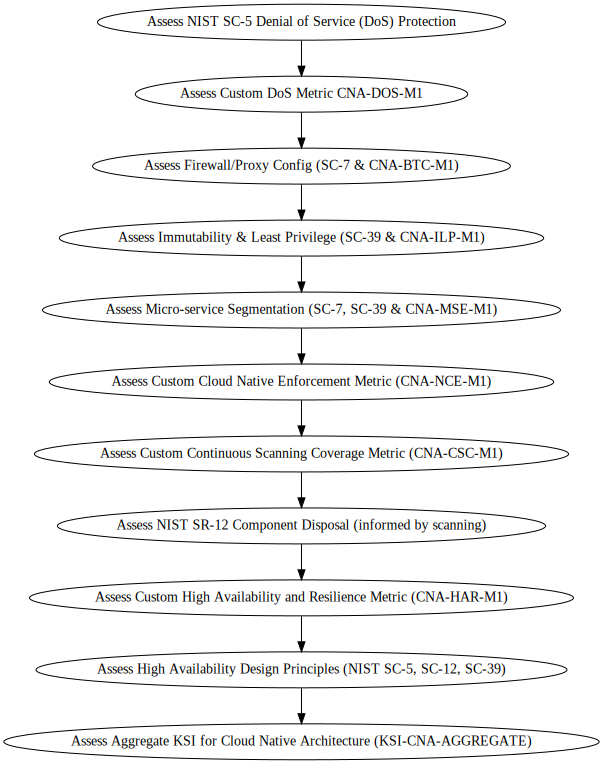

In [12]:
# prompt: create a GraphViz diagram of each of the assessment-plan.tasks in order from the json file

!pip install graphviz
import graphviz

# Check if 'yaml_object' is defined and contains the expected structure
if 'yaml_object' in locals() and 'assessment-plan' in yaml_object and 'tasks' in yaml_object['assessment-plan']:
    tasks = yaml_object['assessment-plan']['tasks']

    # Create a new Digraph object
    dot = graphviz.Digraph(comment='Assessment Plan Tasks')

    # Add nodes and edges for each task in order
    previous_task_id = None
    for i, task in enumerate(tasks):
        # Sanitize task ID and description for GraphViz
        task_id = f"task{i}"
        task_description = task.get('description', f'Task {i+1}').replace('"', '\\"') # Escape double quotes
        task_title = task.get('title', f'Task {i+1}').replace('"', '\\"') # Escape double quotes

        # Use title if available, otherwise use description
        node_label = task_title if task_title else task_description

        dot.node(task_id, node_label)

        if previous_task_id:
            dot.edge(previous_task_id, task_id)

        previous_task_id = task_id

    # Render the diagram
    print("\n--- GraphViz Diagram Source ---")
    print(dot.source)

    # Display the diagram in the notebook
    display(dot)

else:
    print("Could not find 'assessment-plan.tasks' in the uploaded file.")
    print("Please ensure the uploaded JSON/YAML file has the expected structure.")